In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
from matplotlib.colors import ListedColormap  
import seaborn as sns

In [3]:
# Importing data

df = pd.read_csv("data/userdata.csv")
display(df.head())
display(df.dtypes)
display(df.shape)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

(400, 5)

In [4]:
# checking for null and missing values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [15]:
# chekcing for duplicate values
df["Duplicates"] = df.duplicated()
count = 0

for row in df["Duplicates"] :
    #print(row)
    if (row == True):
        count = count+1
print("The total duplicate rows : ",count)

The total duplicate rows :  0


In [19]:
# Find independent and dependent variables.
x = df.iloc[:, [2, 3]]   # age and salary
y = df.iloc[:, 4]   # purchased

In [20]:
x.head(4)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000


In [21]:
y.head(4)

0    0
1    0
2    0
3    0
Name: Purchased, dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

In [22]:
# scaling the features
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns=x.columns)

In [23]:
x.head(5)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


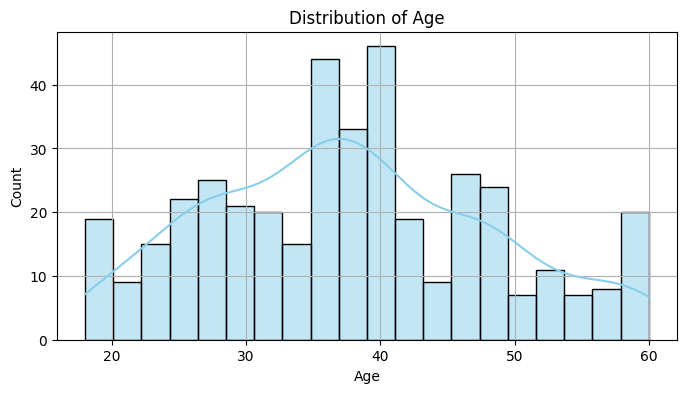

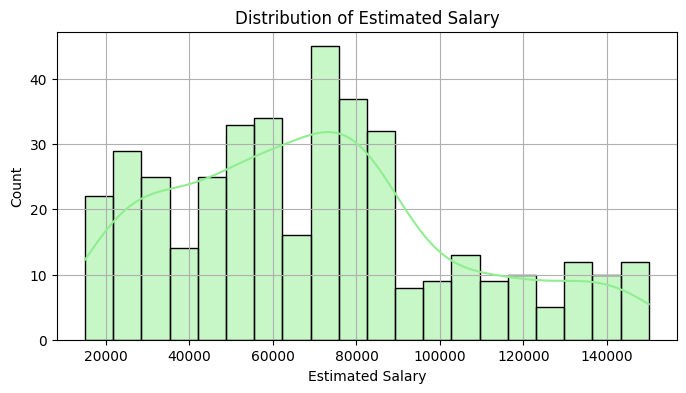

C:\Users\RITIK SAINI\AppData\Local\Temp\ipykernel_20688\4123718759.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Purchased', palette='Set2')


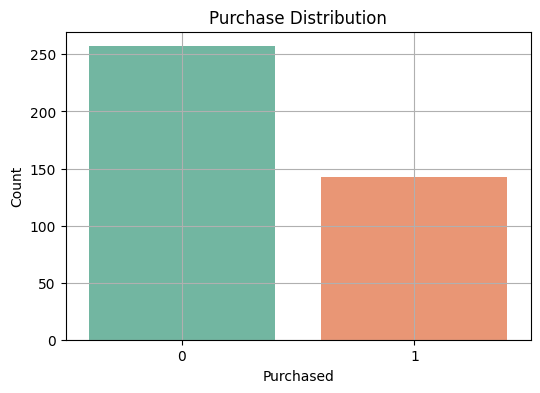

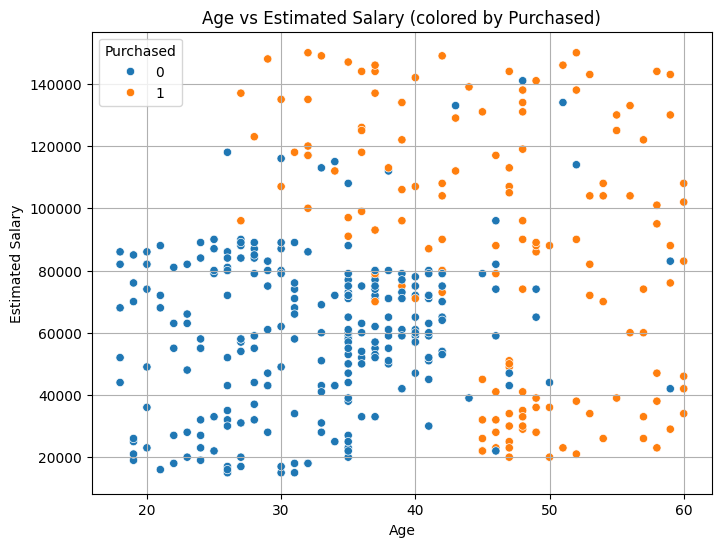

In [101]:



# 1. Distribution of 'Age'
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 2. Distribution of 'Estimated Salary'
plt.figure(figsize=(8, 4))
sns.histplot(df['EstimatedSalary'], kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 3. Count plot of Purchases
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Purchased', palette='Set2')
plt.title('Purchase Distribution')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# 4. Age vs Salary colored by Purchase (Scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='EstimatedSalary', hue='Purchased',)
plt.title('Age vs Estimated Salary (colored by Purchased)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.grid(True)
plt.show()




In [28]:
# split the data in training and testing dataset
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
y_test.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [30]:
# creating the SVM model 
from sklearn.svm import SVC

In [55]:
# using linear kernal
svc1 = SVC(kernel="linear",random_state=0)
svc1.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [56]:
y_pred1 = svc1.predict(x_test)

In [57]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [58]:
svc1.score(x_train,y_train)*100,  svc1.score(x_test,y_test)*100

(82.33333333333334, 90.0)

In [84]:
# Get weights (w1, w2) from model
w = svc1.coef_[0]

# Get bias term (intercept)
b = svc1.intercept_[0]

print(f"Equation of the hyperplane:")
print(f"{w[0]:.4f} * x1 + {w[1]:.4f} * x2 + {b:.4f} = 0")

Equation of the hyperplane:
1.6621 * x1 + 0.9591 * x2 + -0.8391 = 0


In [59]:
# using non linear kernal
svc2 = SVC(kernel="rbf",random_state=0)
svc2.fit(x_train,y_train)

SVC(random_state=0)

In [60]:
y_pred2 = svc2.predict(x_test)

In [61]:
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [63]:
svc2.score(x_train,y_train)*100,  svc2.score(x_test,y_test)*100

(90.66666666666666, 93.0)

In [64]:
# non linear svm is performimg better than linear one

In [66]:
# the result of  both the models
from mlxtend.plotting import plot_decision_regions

C:\Users\RITIK SAINI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\RITIK SAINI\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


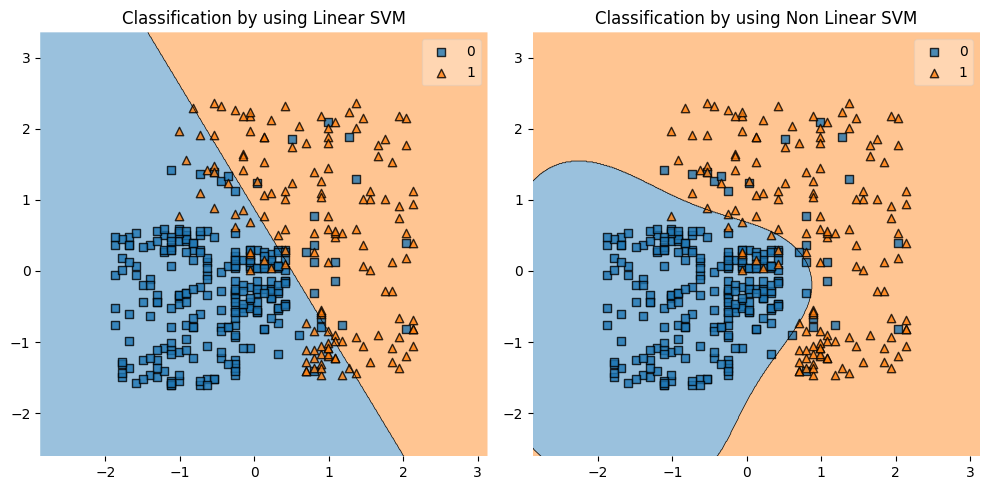

In [74]:

plt.figure(figsize=(10,5))

# linear svm result
plt.subplot(1, 2, 1)
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=svc1)
plt.title("Classification by using Linear SVM")

# non linear svm result
plt.subplot(1, 2, 2)
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=svc2)
plt.title("Classification by using Non Linear SVM")

plt.tight_layout()
plt.show()

In [75]:
# creating confusion matrix for both the models
from sklearn.metrics import confusion_matrix

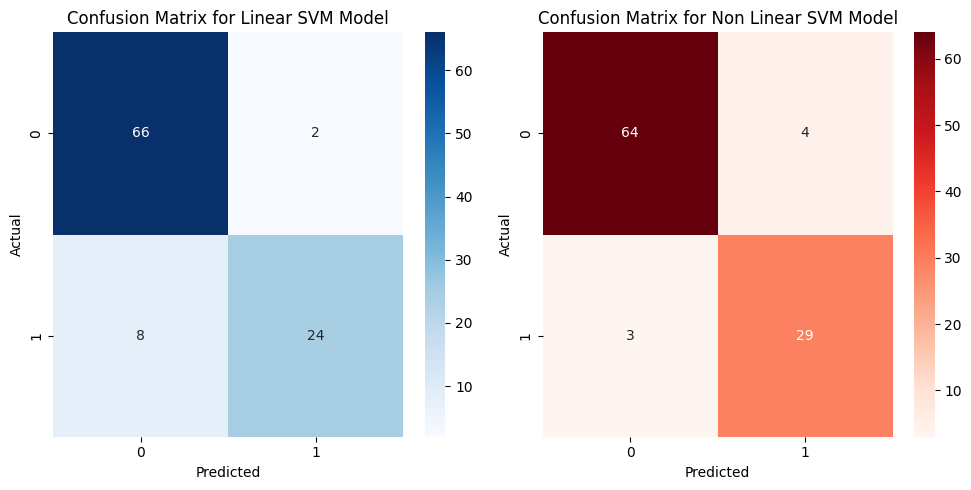

In [94]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
cm1 = confusion_matrix(y_test, y_pred1) # linear svm 
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Linear SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
cm2 = confusion_matrix(y_test, y_pred2) # Non linear svm
sns.heatmap(cm2, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for Non Linear SVM Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [100]:
negClass = 0
posClass = 0

for i in y_test.to_numpy():
    if i == 0:
        negClass += 1
    else:
        posClass += 1
print ("Class 0 : ",negClass)
print("Class 1 : ",posClass)

Class 0 :  68
Class 1 :  32


In [85]:
# Evaluation of the both models

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score

In [95]:

print("For Linear SVM Model : ")
acc1 = accuracy_score(y_test, y_pred1)
f1l = f1_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)

print(f"Accuracy : {acc1:.2f}")
print(f"F1 Score : {f1l:.2f}")
print(f"Recall   : {recall1:.2f}")
print(f"Precision : {precision1:.2f}")

print("-"*80)

print("For Non Linear SVM Model : ")
acc2 = accuracy_score(y_test, y_pred2)
f1Nl = f1_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)

print(f"Accuracy : {acc2:.2f}")
print(f"F1 Score : {f1Nl:.2f}")
print(f"Recall   : {recall2:.2f}")
print(f"Precision : {precision2:.2f}")


For Linear SVM Model : 
Accuracy : 0.90
F1 Score : 0.83
Recall   : 0.75
Precision : 0.92
--------------------------------------------------------------------------------
For Non Linear SVM Model : 
Accuracy : 0.93
F1 Score : 0.89
Recall   : 0.91
Precision : 0.88
